# Exercise5

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/taipeitechmmslab/MMSLAB-TF2/blob/master/Exercise/Exercise5.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/taipeitechmmslab/MMSLAB-TF2/blob/master/Exercise/Exercise5.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

### Import

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers
from preprocessing import parse_aug_fn, parse_fn

## Activation Function 激活函數

1. ReLU

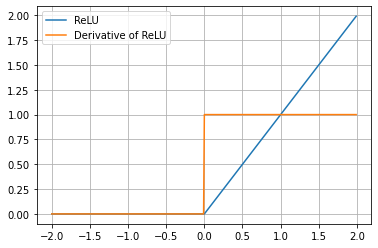

In [2]:
x = np.arange(-2, 2, 0.01)
y = np.where(x>0, x, 0)
plt.plot(x, y, label='ReLU')
plt.grid(True)
x = np.arange(-2, 2, 0.01)
y = np.where(x>0, 1, 0)
plt.plot(x, y, label='Derivative of ReLU')
plt.grid(True)
plt.legend(loc='upper left')

2. Sigmoid

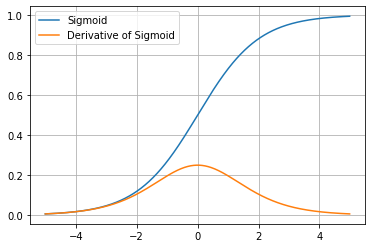

In [3]:
x1 = np.arange(-5, 5, 0.01)
y1 = 1 / (1 + np.exp(-x1))
plt.plot(x1, y1, label='Sigmoid')
plt.grid(True)
x2 = np.arange(-5, 5, 0.01)
y2 = (1 / (1 + np.exp(-x2))) * (1 - (1 / (1 + np.exp(-x2))))
plt.plot(x2, y2, label='Derivative of Sigmoid')
plt.grid(True)
plt.legend(loc='upper left')

3. Tanh

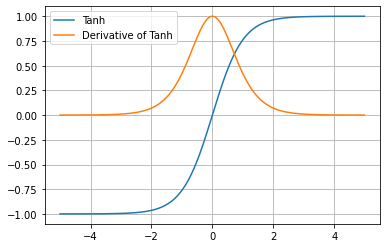

In [4]:
x = np.arange(-5, 5, 0.01)
y = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
plt.plot(x, y, label='Tanh')
plt.grid(True)
x = np.arange(-5, 5, 0.01)
y = 1 - np.square((np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x)))
plt.plot(x, y, label='Derivative of Tanh')
plt.grid(True)
plt.legend(loc='upper left')

## 權重初始化

1. RandomNormal (std 1 )

In [5]:
inputs = keras.Input(shape=(100,))
x1 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 1))(inputs)
x2 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 1))(x1)
x3 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 1))(x2)
x4 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 1))(x3)
x5 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 1))(x4)
model_1 = keras.Model(inputs, [x1, x2, x3, x4, x5])

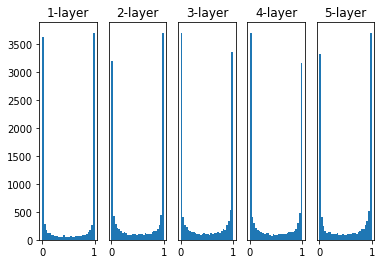

In [6]:
x = np.random.randn(100, 100)
outputs = model_1.predict(x)
for i, layer_output in enumerate(outputs):
    plt.subplot(1, 5, i+1)  # 選擇顯示在表中的哪個格子裡
    plt.title(str(i+1) + "-layer")  # 設定值方圖的標題
    if i != 0: plt.yticks([], [])  # 只顯示第一列值方圖的y軸
    plt.hist(layer_output.flatten(), 30, range=[0,1])  # 畫出值方圖
plt.show()

2. RandomNormal (std 0.05 )

In [7]:
inputs = keras.Input(shape=(100,))
x1 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 0.01))(inputs)
x2 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 0.01))(x1)
x3 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 0.01))(x2)
x4 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 0.01))(x3)
x5 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 0.01))(x4)
model_2 = keras.Model(inputs, [x1, x2, x3, x4, x5])

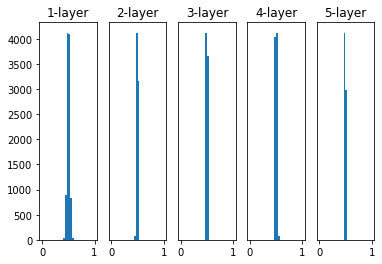

In [8]:
x = np.random.randn(100, 100)
outputs = model_2.predict(x)
for i, layer_output in enumerate(outputs):
    plt.subplot(1, 5, i+1)  # 選擇顯示在表中的哪個格子裡
    plt.title(str(i+1) + "-layer")  # 設定值方圖的標題
    if i != 0: plt.yticks([], [])  # 只顯示第一列值方圖的y軸
    plt.hist(layer_output.flatten(), 30, range=[0,1])  # 畫出值方圖
plt.show()

3. Xavier/Glorot Initialization (Sigmoid)

In [9]:
inputs = keras.Input(shape=(100,))
x1 = layers.Dense(100, 'sigmoid', False, initializers.glorot_normal())(inputs)
x2 = layers.Dense(100, 'sigmoid', False, initializers.glorot_normal())(x1)
x3 = layers.Dense(100, 'sigmoid', False, initializers.glorot_normal())(x2)
x4 = layers.Dense(100, 'sigmoid', False, initializers.glorot_normal())(x3)
x5 = layers.Dense(100, 'sigmoid', False, initializers.glorot_normal())(x4)
model_3 = keras.Model(inputs, [x1, x2, x3, x4, x5])

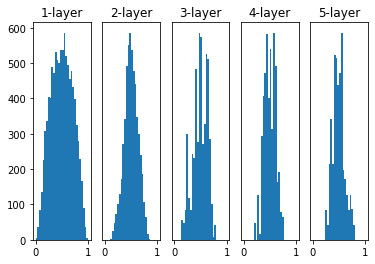

In [10]:
x = np.random.randn(100, 100)
outputs = model_3.predict(x)
for i, layer_output in enumerate(outputs):
    plt.subplot(1, 5, i+1)  # 選擇顯示在表中的哪個格子裡
    plt.title(str(i+1) + "-layer")  # 設定值方圖的標題
    if i != 0: plt.yticks([], [])  # 只顯示第一列值方圖的y軸
    plt.hist(layer_output.flatten(), 30, range=[0,1])  # 畫出值方圖
plt.show()

4. Xavier/Glorot Initialization (ReLU)

In [11]:
inputs = keras.Input(shape=(100,))
x1 = layers.Dense(100, 'relu', False, initializers.glorot_normal())(inputs)
x2 = layers.Dense(100, 'relu', False, initializers.glorot_normal())(x1)
x3 = layers.Dense(100, 'relu', False, initializers.glorot_normal())(x2)
x4 = layers.Dense(100, 'relu', False, initializers.glorot_normal())(x3)
x5 = layers.Dense(100, 'relu', False, initializers.glorot_normal())(x4)
model_4 = keras.Model(inputs, [x1, x2, x3, x4, x5])

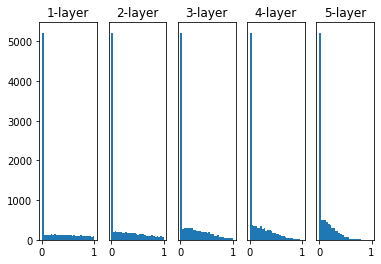

In [12]:
x = np.random.randn(100, 100)
outputs = model_4.predict(x)
for i, layer_output in enumerate(outputs):
    plt.subplot(1, 5, i+1)  # 選擇顯示在表中的哪個格子裡
    plt.title(str(i+1) + "-layer")  # 設定值方圖的標題
    if i != 0: plt.yticks([], [])  # 只顯示第一列值方圖的y軸
    plt.hist(layer_output.flatten(), 30, range=[0,1])  # 畫出值方圖
plt.show()

5. He initialization

In [13]:
inputs = keras.Input(shape=(100,))
x1 = layers.Dense(100, 'relu', False, initializers.he_normal())(inputs)
x2 = layers.Dense(100, 'relu', False, initializers.he_normal())(x1)
x3 = layers.Dense(100, 'relu', False, initializers.he_normal())(x2)
x4 = layers.Dense(100, 'relu', False, initializers.he_normal())(x3)
x5 = layers.Dense(100, 'relu', False, initializers.he_normal())(x4)
model_5 = keras.Model(inputs, [x1, x2, x3, x4, x5])

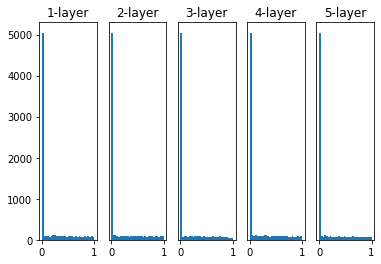

In [14]:
x = np.random.randn(100, 100)
outputs = model_5.predict(x)
for i, layer_output in enumerate(outputs):
    plt.subplot(1, 5, i+1)  # 選擇顯示在表中的哪個格子裡
    plt.title(str(i+1) + "-layer")  # 設定值方圖的標題
    if i != 0: plt.yticks([], [])  # 只顯示第一列值方圖的y軸
    plt.hist(layer_output.flatten(), 30, range=[0,1])  # 畫出值方圖
plt.show()

# 使用CIFAR-10 訓練Model

### Import必要套件

In [15]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers 
# 從資料夾中的preprocessing.py檔案中Import parse_aug_fn和parse_fn函數
from preprocessing import parse_aug_fn, parse_fn

### 讀取數據並分析
載入Cifar10數據集：

In [23]:
# 將train Data重新分成8:2等分，分別分給train data, valid data
# Write your code here
train_split, valid_split = ['train[:80%]', 'train[80%:]']
# 取得訓練數據，並順便讀取data的資訊
train_data, info = tfds.load("cifar10", split=train_split, with_info=True, data_dir='/home/share/dataset/tensorflow-datasets')
# 取得驗證數據
valid_data = tfds.load("cifar10", split=valid_split, data_dir='/home/share/dataset/tensorflow-datasets')
# 取得測試數據
test_data = tfds.load("cifar10", split=tfds.Split.TEST, data_dir='/home/share/dataset/tensorflow-datasets')

### Dataset 設定

In [24]:
AUTOTUNE = tf.data.experimental.AUTOTUNE  # 自動調整模式
batch_size = 64  # 批次大小
train_num = int(info.splits['train'].num_examples / 10) * 9  # 訓練資料數量

train_data = train_data.shuffle(train_num)  # 打散資料集
# 載入預處理「 parse_aug_fn」function，cpu數量為自動調整模式
train_data = train_data.map(map_func=parse_aug_fn, num_parallel_calls=AUTOTUNE)
# 設定批次大小並將prefetch模式開啟(暫存空間為自動調整模式)
train_data = train_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

# 載入預處理「 parse_fn」function，cpu數量為自動調整模式
valid_data = valid_data.map(map_func=parse_fn, num_parallel_calls=AUTOTUNE)
# 設定批次大小並將prefetch模式開啟(暫存空間為自動調整模式)
valid_data = valid_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

# 載入預處理「 parse_fn」function，cpu數量為自動調整模式
test_data = test_data.map(map_func=parse_fn, num_parallel_calls=AUTOTUNE)
# 設定批次大小並將prefetch模式開啟(暫存空間為自動調整模式)
test_data = test_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

建立網路模型，這邊使用到以下幾種網路層：
- keras.Input：輸入層(輸入影像大小為32x32x3)
- layers.Conv2D：卷積層(使用3x3大小的kernel)
- layers.BatchNormalization：BatchNormalization層(使用預設參數)
- layers.ReLU：ReLU激活函數層(使用在BatchNormalization層之後)
- layers.MaxPool2D：池化層(對特徵圖下採樣)
- layers.Flatten：扁平層(特徵圖轉成一維Tensor)
- layers.Dropout：Dropout層(每次訓練隨機丟棄50%網路)
- layers.Dense：全連接層(隱藏層使用ReLU激活函數，輸出層使用Softmax激活函數)

因為大部分激活函數都會在BatchNormalization之後，所以這邊的搭建與前幾個model有些差別。

In [25]:
#========================= Write your code here ========================= #
# 建立輸入層
inputs = keras.Input(shape=(32, 32, 3))
# 第1層convolution層，filters=64, kernel_size=5x5
x = layers.Conv2D(64, (5, 5))(inputs)
# 第2層BatchNormalization層
x = layers.BatchNormalization()(x)
# 第3層ReLU層
x = layers.ReLU()(x)
# 第4層MaxPool2D層
x = layers.MaxPool2D()(x)
# 第5層convolution層，filters=128, kernel_size=3x3
x = layers.Conv2D(128, (3, 3))(x)
# 第6層BatchNormalization層
x = layers.BatchNormalization()(x)
# 第7層ReLU層
x = layers.ReLU()(x)
# 第8層convolution層，filters=128, kernel_size=3x3
x = layers.Conv2D(128, (3, 3))(x)
# 第9層BatchNormalization層
x = layers.BatchNormalization()(x)
# 第10層ReLU層
x = layers.ReLU()(x)
# 第11層convolution層，filters=64, kernel_size=3x3
x = layers.Conv2D(64, (3, 3))(x)
# 第12層BatchNormalization層
x = layers.BatchNormalization()(x)
# 第13層ReLU層
x = layers.ReLU()(x)
# 第14層Flatten層
x = layers.Flatten()(x)
# 第15層全連接層，unit=32, relu activation function
x = layers.Dense(32, activation='relu')(x)
# 最後一層全連接層，輸出維度為類別數量，並且使用sigmoid激活函數
outputs = layers.Dense(16, activation='softmax')(x)
#======================================================================== #

# 建立網路模型(將輸入到輸出所有經過的網路層連接起來)
model = keras.Model(inputs, outputs, name='model')
model.summary()  # 顯示網路架構

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        4864      
_________________________________________________________________
batch_normalization_4 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
re_lu_4 (ReLU)               (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
batch_normalization_5 (Batch (None, 12, 12, 128)       512   

建立Callback function：

In [26]:
model_dir = 'lab5-logs/models/'
if not os.path.isdir(model_dir):
    os.makedirs(model_dir)

In [27]:
# 儲存訓練記錄檔
log_dir = os.path.join('lab5-logs', 'batchnormalization')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
# 儲存最好的網路模型權重
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/best-model.h5', 
                                             monitor='val_categorical_accuracy', 
                                             save_best_only=True, 
                                             mode='max')

設定訓練使用的優化器、損失函數和指標函數

In [28]:
model.compile(keras.optimizers.Adam(), 
               loss=keras.losses.CategoricalCrossentropy(), 
               metrics=[keras.metrics.CategoricalAccuracy()])

訓練網路模型

In [30]:
history = model.fit(train_data,
                        epochs=30, 
                        validation_data=valid_data,
                        callbacks=[model_cbk, model_mckp])

Epoch 1/30


ValueError: ignored

驗證在測試集上：

In [31]:
model = keras.models.load_model('lab5-logs/models/best-model.h5')
loss, acc = model.evaluate(test_data)
print('\nModel Accuracy: {}%'.format(acc))

OSError: ignored

### 比較四種網路的訓練結果

In [32]:
model = keras.models.load_model('lab5-logs/models/best-model.h5')
loss, acc = model.evaluate(test_data)

OSError: ignored